<a href="https://colab.research.google.com/github/Byeon-MJ/Dacon_SNP_Repo/blob/main/Dacon_SNP_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dacon Single Nucleotide Polymorphism Classification

## 더 해볼 것
- Grid Search
- LightGBM, 앙상블
- Hyper Parameter Tuning

## Module Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## DataSet Load

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/Project/Dacon_SNP/dataset/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Project/Dacon_SNP/dataset/test.csv')
info = pd.read_csv('/content/gdrive/MyDrive/Project/Dacon_SNP/dataset/snp_info.csv')

In [ ]:
train.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      262 non-null    object
 1   father  262 non-null    int64 
 2   mother  262 non-null    int64 
 3   gender  262 non-null    int64 
 4   trait   262 non-null    int64 
 5   SNP_01  262 non-null    object
 6   SNP_02  262 non-null    object
 7   SNP_03  262 non-null    object
 8   SNP_04  262 non-null    object
 9   SNP_05  262 non-null    object
 10  SNP_06  262 non-null    object
 11  SNP_07  262 non-null    object
 12  SNP_08  262 non-null    object
 13  SNP_09  262 non-null    object
 14  SNP_10  262 non-null    object
 15  SNP_11  262 non-null    object
 16  SNP_12  262 non-null    object
 17  SNP_13  262 non-null    object
 18  SNP_14  262 non-null    object
 19  SNP_15  262 non-null    object
 20  class   262 non-null    object
dtypes: int64(4), object(17)
memory usage: 43.1+ KB


In [ ]:
test.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      175 non-null    object
 1   father  175 non-null    int64 
 2   mother  175 non-null    int64 
 3   gender  175 non-null    int64 
 4   trait   175 non-null    int64 
 5   SNP_01  175 non-null    object
 6   SNP_02  175 non-null    object
 7   SNP_03  175 non-null    object
 8   SNP_04  175 non-null    object
 9   SNP_05  175 non-null    object
 10  SNP_06  175 non-null    object
 11  SNP_07  175 non-null    object
 12  SNP_08  175 non-null    object
 13  SNP_09  175 non-null    object
 14  SNP_10  175 non-null    object
 15  SNP_11  175 non-null    object
 16  SNP_12  175 non-null    object
 17  SNP_13  175 non-null    object
 18  SNP_14  175 non-null    object
 19  SNP_15  175 non-null    object
dtypes: int64(4), object(16)
memory usage: 27.5+ KB


In [ ]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x

In [ ]:
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

In [ ]:
train_x

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,0,0,0,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A
1,0,0,0,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A
2,0,0,0,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A
3,0,0,0,1,A A,G G,A A,G A,A A,G G,G G,A A,G G,A G,G G,G G,G G,A A,G G
4,0,0,0,2,G G,G G,C C,A A,C C,A A,A A,A A,A A,G G,A A,A A,A G,A A,G A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,0,0,2,A G,A G,A A,G A,C C,A G,A A,G A,A A,G G,A G,G A,A A,A A,A A
258,0,0,0,2,G G,A A,C A,A A,A A,A G,G A,G A,A A,A G,A G,A A,A G,A A,G A
259,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A A,G G,G G,G G,C A,G G
260,0,0,0,1,A A,G G,A A,G A,A A,G G,G G,A A,G A,A G,A G,G A,G G,C A,G G


In [ ]:
train_y

0      B
1      C
2      B
3      A
4      C
      ..
257    B
258    C
259    A
260    A
261    B
Name: class, Length: 262, dtype: object

## Label Encoding

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

In [ ]:
snp_col

['SNP_01',
 'SNP_02',
 'SNP_03',
 'SNP_04',
 'SNP_05',
 'SNP_06',
 'SNP_07',
 'SNP_08',
 'SNP_09',
 'SNP_10',
 'SNP_11',
 'SNP_12',
 'SNP_13',
 'SNP_14',
 'SNP_15']

In [ ]:
train_data = []
for col in snp_col:
    train_data += list(train_x[col].values)

In [ ]:
train_y = class_le.fit_transform(train_y)
snp_le.fit(train_data)

LabelEncoder()

In [ ]:
train_x.columns

Index(['father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02', 'SNP_03',
       'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09', 'SNP_10',
       'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15'],
      dtype='object')

In [ ]:
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

In [ ]:
train_x

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,0,0,0,2,5,1,0,4,2,0,0,5,0,5,1,0,0,0,0
1,0,0,0,2,1,1,2,0,0,1,0,4,0,1,0,4,5,0,0
2,0,0,0,2,5,5,0,4,3,5,0,4,4,1,0,0,0,0,0
3,0,0,0,1,0,5,0,4,0,5,5,0,5,1,5,5,5,0,5
4,0,0,0,2,5,5,3,0,3,0,0,0,0,5,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,0,0,2,1,1,0,4,3,1,0,4,0,5,1,4,0,0,0
258,0,0,0,2,5,0,2,0,0,1,4,4,0,1,1,0,1,0,4
259,0,0,0,1,1,5,0,4,0,1,5,4,4,0,5,5,5,2,5
260,0,0,0,1,0,5,0,4,0,5,5,0,4,1,1,4,5,2,5


### Data Split

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(
    train_x, train_y, test_size=0.4)

## Decision Tree

### Model Fit

In [ ]:
# max_depth=depth
model = DecisionTreeClassifier(max_depth=8)
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=8)

In [ ]:
train_pred = model.predict(train_x)
val_pred = model.predict(val_x)
test_pred = model.predict(test_x)

In [ ]:
print(f'Train Score : {accuracy_score(train_y, train_pred)}')
print(f'Validation Score : {accuracy_score(val_y, val_pred)}')

Train Score : 0.9872611464968153
Validation Score : 0.9047619047619048


### 하이퍼 파라미터 튜닝

In [ ]:
def test_depth(depth):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(train_x, train_y)
    train_pred = model.predict(train_x)
    val_pred = model.predict(val_x)
    print(f"depth : {depth}")
    print(f'Train Score : {accuracy_score(train_y, train_pred)}')
    print(f'Validation Score : {accuracy_score(val_y, val_pred)}')

In [ ]:
for i in range(1, 20):
    test_depth(i)

depth : 1
Train Score : 0.7197452229299363
Validation Score : 0.6666666666666666
depth : 2
Train Score : 0.8662420382165605
Validation Score : 0.8
depth : 3
Train Score : 0.910828025477707
Validation Score : 0.8285714285714286
depth : 4
Train Score : 0.910828025477707
Validation Score : 0.8285714285714286
depth : 5
Train Score : 0.9426751592356688
Validation Score : 0.8761904761904762
depth : 6
Train Score : 0.9745222929936306
Validation Score : 0.9238095238095239
depth : 7
Train Score : 0.9872611464968153
Validation Score : 0.9238095238095239
depth : 8
Train Score : 0.9872611464968153
Validation Score : 0.9238095238095239
depth : 9
Train Score : 0.9872611464968153
Validation Score : 0.8952380952380953
depth : 10
Train Score : 0.9936305732484076
Validation Score : 0.8952380952380953
depth : 11
Train Score : 1.0
Validation Score : 0.9047619047619048
depth : 12
Train Score : 1.0
Validation Score : 0.8952380952380953
depth : 13
Train Score : 1.0
Validation Score : 0.9142857142857143
depth

### Tree Visualization

In [ ]:
train_x.columns

Index(['father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02', 'SNP_03',
       'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09', 'SNP_10',
       'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15'],
      dtype='object')

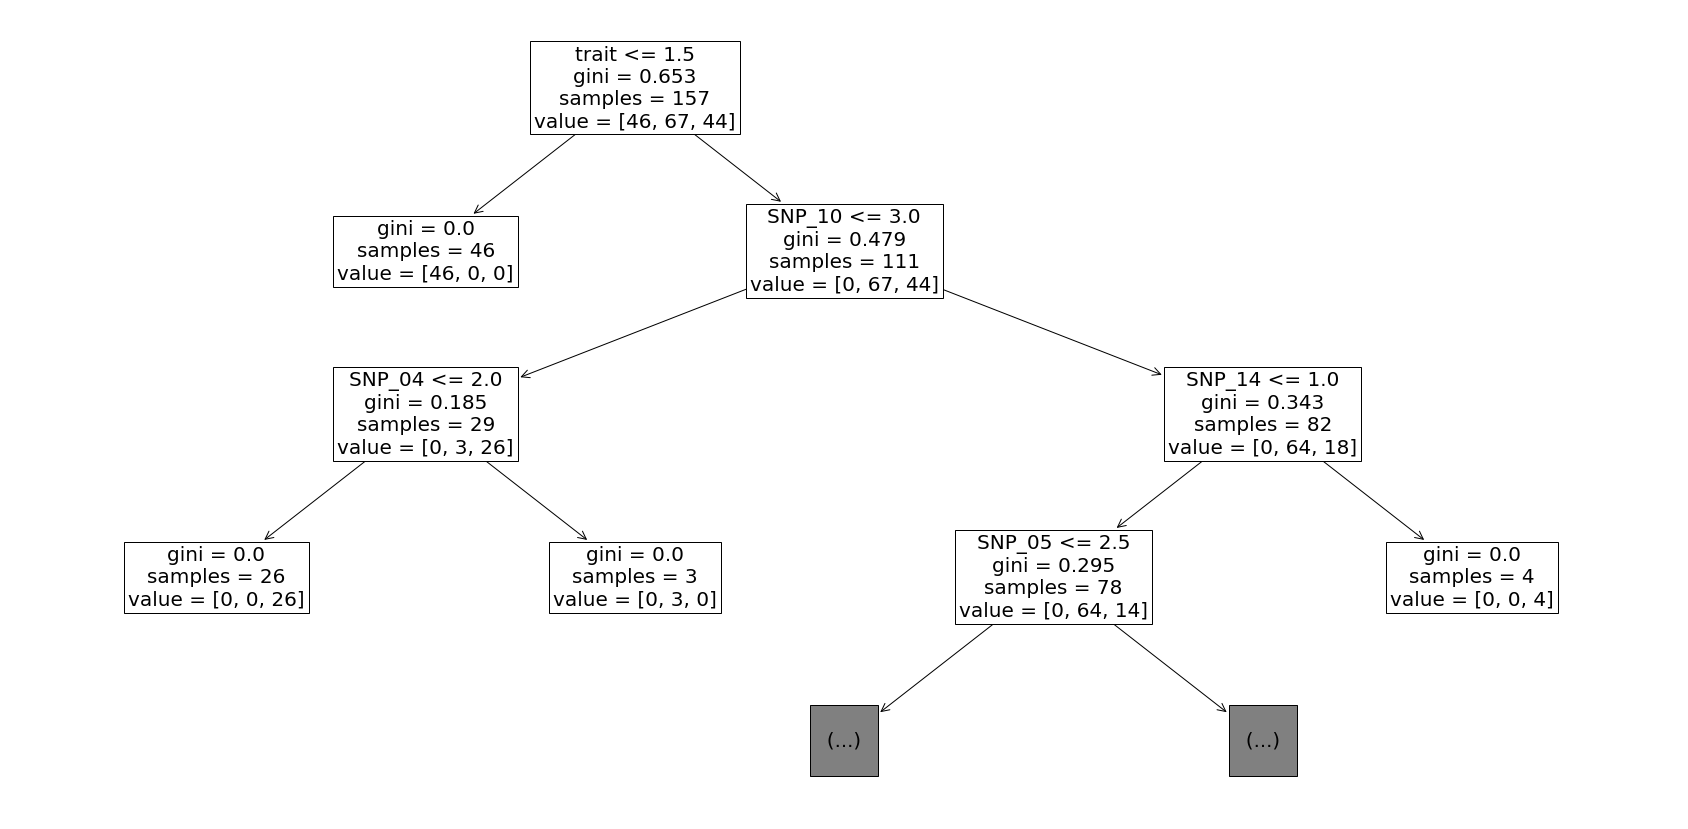

In [ ]:
plt.figure(figsize=(30, 15)) # plt 객체의 크기 결정
plot_tree(model, max_depth=3, fontsize=20, feature_names=train_x.columns) # 독립변수명을 추가로 지정
plt.show()

## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()

In [ ]:
model.fit(train_x, train_y)

XGBClassifier(objective='multi:softprob')

In [ ]:
train_pred = model.predict(train_x)
val_pred = model.predict(val_x)
test_pred = model.predict(test_x)

In [ ]:
print(f'Train Score : {accuracy_score(train_y, train_pred)}')
print(f'Validation Score : {accuracy_score(val_y, val_pred)}')

Train Score : 1.0
Validation Score : 0.9238095238095239


## K-Fold

In [ ]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x

In [ ]:
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

In [ ]:
train_x

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,0,0,0,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A
1,0,0,0,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A
2,0,0,0,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A
3,0,0,0,1,A A,G G,A A,G A,A A,G G,G G,A A,G G,A G,G G,G G,G G,A A,G G
4,0,0,0,2,G G,G G,C C,A A,C C,A A,A A,A A,A A,G G,A A,A A,A G,A A,G A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,0,0,2,A G,A G,A A,G A,C C,A G,A A,G A,A A,G G,A G,G A,A A,A A,A A
258,0,0,0,2,G G,A A,C A,A A,A A,A G,G A,G A,A A,A G,A G,A A,A G,A A,G A
259,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A A,G G,G G,G G,C A,G G
260,0,0,0,1,A A,G G,A A,G A,A A,G G,G G,A A,G A,A G,A G,G A,G G,C A,G G


In [ ]:
train_y

0      B
1      C
2      B
3      A
4      C
      ..
257    B
258    C
259    A
260    A
261    B
Name: class, Length: 262, dtype: object

### Label Encoding

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

In [ ]:
snp_col

['SNP_01',
 'SNP_02',
 'SNP_03',
 'SNP_04',
 'SNP_05',
 'SNP_06',
 'SNP_07',
 'SNP_08',
 'SNP_09',
 'SNP_10',
 'SNP_11',
 'SNP_12',
 'SNP_13',
 'SNP_14',
 'SNP_15']

In [ ]:
train_data = []
for col in snp_col:
    train_data += list(train_x[col].values)

In [ ]:
train_y = class_le.fit_transform(train_y)
snp_le.fit(train_data)

LabelEncoder()

In [ ]:
train_x.columns

Index(['father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02', 'SNP_03',
       'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09', 'SNP_10',
       'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15'],
      dtype='object')

In [ ]:
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
train_acc_total = []
val_acc_total = []

model = xgb.XGBClassifier()

for train_index, val_index in kf.split(train_x):
    X_train, X_val = train_x.loc[train_index], train_x.loc[val_index]
    y_train, y_val = train_y[train_index], train_y[val_index]

    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    print(f'Train Score : {accuracy_score(y_train, train_pred)}')
    print(f'Validation Score : {accuracy_score(y_val, val_pred)}')
    
    train_acc_total.append(accuracy_score(y_train, train_pred))
    val_acc_total.append(accuracy_score(y_val, val_pred))

Train Score : 0.9952153110047847
Validation Score : 0.9056603773584906
Train Score : 1.0
Validation Score : 0.9245283018867925
Train Score : 1.0
Validation Score : 0.9423076923076923
Train Score : 1.0
Validation Score : 0.8846153846153846
Train Score : 1.0
Validation Score : 0.9807692307692307


In [ ]:
train_acc_total

[0.9952153110047847, 1.0, 1.0, 1.0, 1.0]

In [ ]:
val_acc_total

[0.9056603773584906,
 0.9245283018867925,
 0.9423076923076923,
 0.8846153846153846,
 0.9807692307692307]

In [ ]:
test_pred = model.predict(test_x)

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
parameter = {
    'learning_rate' : [0.01, 0.1, 0.3, 0.5, 0.7], # 학습률 수정
    'max_depth' : [5, 7, 10, 30, 50],           # 트리 깊이 제한
    'subsample' : [0.5, 0.7, 1],        # subsample 비율에 따라 부분 추출
    'n_estimators' : [200, 300, 500, 1000]   # 트리 개수
}

In [ ]:
model = xgb.XGBClassifier()

In [ ]:
# 모델, 파라미터 dict, n_jobs, scoring='f1', cv= kfold -> folding 횟수
gs_model = GridSearchCV(
    estimator = model, param_grid = parameter, scoring='f1_macro', cv=5
)

In [ ]:
gs_model.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7],
                         'max_depth': [5, 7, 10, 30, 50],
                         'n_estimators': [200, 300, 500, 1000],
                         'subsample': [0.5, 0.7, 1]},
             scoring='f1_macro')

In [ ]:
test_pred = gs_model.predict(test_x)

In [ ]:
print(gs_model.best_params_)
print(gs_model.best_score_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5}
0.9429624294368739


# Submission

In [ ]:
submit = pd.read_csv('/content/gdrive/MyDrive/Project/Dacon_SNP/dataset/sample_submission.csv')

In [ ]:
submit['class'] = class_le.inverse_transform(test_pred)

In [ ]:
submit.to_csv('/content/gdrive/MyDrive/Project/Dacon_SNP/dataset/submit.csv', index=False)